<a href="https://colab.research.google.com/github/cgonzalez022407-art/Proyecto_Iintegrador_Supervisado/blob/main/docs/ICT_EDA_UACO_UARG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA comparativo UARG vs UACO (2018–2025)

## Objetivo general

Realizar un análisis exploratorio de datos (EDA) de los alumnos de las unidades académicas **UARG** y **UACO** a partir de los registros del sistema **SIU-Guaraní** (cortes 2018–2025), unificando los datasets en una única base y caracterizando en detalle la carrera **Analista de Sistemas** como caso de estudio común entre ambas unidades. El propósito es generar insumos cuantitativos y visuales para el posterior **ICT**.

## Objetivos específicos

1. **Unificación y preparación de datos**
   - Leer y unificar todos los archivos de alumnos por corte/año en un solo `DataFrame`.
   - Incorporar las variables de contexto:
     - `ANIO_CORTE` (año del corte).
     - `UNIDAD_ACADEMICA` (UARG / UACO).
   - Identificar columnas vacías, duplicadas o inconsistentes y dejar un dataset de trabajo (`df_eda`) limpio y estructurado.

2. **Caracterización general UARG vs UACO**
   - Describir la evolución de la matrícula total por unidad académica y año de corte (2018–2025).
   - Identificar las carreras con mayor cantidad de alumnos (Top 10) y el peso relativo de Analista de Sistemas dentro del conjunto.

3. **Análisis específico de la carrera Analista de Sistemas**
   - Comparar la distribución de alumnos de Analista de Sistemas por unidad académica y año de corte.
   - Caracterizar el **perfil socioeconómico** de los estudiantes (actividad laboral, situación de trabajo y presencia de hijos) en UARG y UACO, considerando las limitaciones de calidad de datos.
   - Analizar el **avance académico** mediante la variable `PORCENTAJE` y la **antigüedad en la carrera** (`ANTIG_CARR`), comparando las distribuciones entre UARG y UACO.

4. **Discusión y síntesis**
   - Explicitar las **limitaciones** de la información disponible (valores faltantes, outliers, cobertura parcial).
   - Elaborar una **síntesis de hallazgos** que sirva como base para la construcción de indicadores e interpretaciones en el ICT.


## Índice

1. [Imports y configuración inicial](#imports)
2. [Carga y unificación de datos (UARG y UACO)](#carga)
3. [Limpieza y estandarización de columnas](#limpieza)
4. [Panorama general UARG vs UACO](#panorama)
5. [Análisis específico: Analista de Sistemas](#sis)
6. [Limitaciones de los datos](#limitaciones)
7. [Síntesis del EDA y aportes para el ICT](#sintesis)
8. [Trabajo futuro y proyección del análisis](#futuro)



<a name="imports"></a>
## 1. Imports y configuración inicial

En esta primera celda, importaremos todas las librerías que necesitaremos para nuestro análisis.

In [16]:
# 1. Librerías básicas
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Opcional: para visualizar mejor
pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", "{:.2f}".format)

print("Librerías cargadas correctamente.")


Librerías cargadas correctamente.


<a name="carga"></a>
o DataFrame.
## 2. Carga y unificación de datos (UARG y UACO)

En esta sección:
- Leemos todos los archivos de alumnos de **UARG** y **UACO** (2018–2025) desde la carpeta `Tesis Maestria/dataset/SIU-GUARANI`.
- Creamos un único DataFrame unificado `df_all`.
- Agregamos las columnas:
  - `UNIDAD_ACADEMICA` (UARG / UACO).
  - `ANIO_CORTE` (año del archivo).


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
base_path = "/content/drive/MyDrive/Tesis Maestria/dataset/SIU-GUARANI"

archivos = []

# Recorremos los años que tenés en la carpeta (2018 a 2025)
for anio in range(2018, 2026):
    for unidad in ["UARG", "UACO"]:
        path = f"{base_path}/GUA_ALUMNOS_{unidad}_{anio}.xlsx"

        if os.path.exists(path):
            archivos.append({
                "unidad": unidad,
                "anio_corte": anio,
                "path": path
            })
        else:
            print(f"⚠️ No encontrado (se salta): {path}")

len(archivos), archivos[:5]


(16,
 [{'unidad': 'UARG',
   'anio_corte': 2018,
   'path': '/content/drive/MyDrive/Tesis Maestria/dataset/SIU-GUARANI/GUA_ALUMNOS_UARG_2018.xlsx'},
  {'unidad': 'UACO',
   'anio_corte': 2018,
   'path': '/content/drive/MyDrive/Tesis Maestria/dataset/SIU-GUARANI/GUA_ALUMNOS_UACO_2018.xlsx'},
  {'unidad': 'UARG',
   'anio_corte': 2019,
   'path': '/content/drive/MyDrive/Tesis Maestria/dataset/SIU-GUARANI/GUA_ALUMNOS_UARG_2019.xlsx'},
  {'unidad': 'UACO',
   'anio_corte': 2019,
   'path': '/content/drive/MyDrive/Tesis Maestria/dataset/SIU-GUARANI/GUA_ALUMNOS_UACO_2019.xlsx'},
  {'unidad': 'UARG',
   'anio_corte': 2020,
   'path': '/content/drive/MyDrive/Tesis Maestria/dataset/SIU-GUARANI/GUA_ALUMNOS_UARG_2020.xlsx'}])

Unificamos todo en un solo dataset y creamos una columnas que identifiquen unidad y año.

In [13]:
dataframes = []

for info in archivos:
    unidad = info["unidad"]
    anio_corte = info["anio_corte"]
    path = info["path"]

    print(f"Leyendo: {os.path.basename(path)} | Unidad: {unidad} | Año corte: {anio_corte}")

    df = pd.read_excel(path)

    df["UNIDAD_ACADEMICA"] = unidad
    df["ANIO_CORTE"] = anio_corte

    dataframes.append(df)

print(f"\n✅ Se leyeron {len(dataframes)} dataframes.")


Leyendo: GUA_ALUMNOS_UARG_2018.xlsx | Unidad: UARG | Año corte: 2018
Leyendo: GUA_ALUMNOS_UACO_2018.xlsx | Unidad: UACO | Año corte: 2018
Leyendo: GUA_ALUMNOS_UARG_2019.xlsx | Unidad: UARG | Año corte: 2019
Leyendo: GUA_ALUMNOS_UACO_2019.xlsx | Unidad: UACO | Año corte: 2019
Leyendo: GUA_ALUMNOS_UARG_2020.xlsx | Unidad: UARG | Año corte: 2020
Leyendo: GUA_ALUMNOS_UACO_2020.xlsx | Unidad: UACO | Año corte: 2020
Leyendo: GUA_ALUMNOS_UARG_2021.xlsx | Unidad: UARG | Año corte: 2021
Leyendo: GUA_ALUMNOS_UACO_2021.xlsx | Unidad: UACO | Año corte: 2021
Leyendo: GUA_ALUMNOS_UARG_2022.xlsx | Unidad: UARG | Año corte: 2022
Leyendo: GUA_ALUMNOS_UACO_2022.xlsx | Unidad: UACO | Año corte: 2022
Leyendo: GUA_ALUMNOS_UARG_2023.xlsx | Unidad: UARG | Año corte: 2023
Leyendo: GUA_ALUMNOS_UACO_2023.xlsx | Unidad: UACO | Año corte: 2023
Leyendo: GUA_ALUMNOS_UARG_2024.xlsx | Unidad: UARG | Año corte: 2024
Leyendo: GUA_ALUMNOS_UACO_2024.xlsx | Unidad: UACO | Año corte: 2024
Leyendo: GUA_ALUMNOS_UARG_2025.xls

In [14]:
df_all = pd.concat(dataframes, ignore_index=True)

print("Forma del dataset unificado (filas, columnas):", df_all.shape)
df_all.head()


Forma del dataset unificado (filas, columnas): (111483, 39)


,ACT ECON,HS TRAB,CANT HIJOS,TITULO SEC,AÑO EGRESO,FECHA RELEV,CARRERA,NOMBRE,PLAN,VERSION,REGULAR,FECHA INGR,REINSCRIP,CNTMATREG,CNTMATOPT,CNTMATNORM,CNTMATGEN,CNTMATAPROB,CNTMATPLAN,CNTMATAPROBAÑO,REINSCRIPT,INSCRIP,FECHA_ING,PORCENTAJE,CNTMATSINAPROB,IDENTIFICADOR,UNIDAD_ACADEMICA,ANIO_CORTE,INGRESANTE,PLAN,ESCUELA,FECHA_INGR_CARRERA,AÑO_ING_Carrera,CANT_MAT_GEN,FECHA_ING_UNIV,Porcentaje,ESTADO,Unnamed: 50,OBSERVACIONES
0,\\N,\\N,\\N,PERITO MERCANTIL,1977,20/03/2006,16,Analista de Sistemas,016P3,3,N,04/28/2004,2006-03-08 15:58:33,0,0,2,0,2,20.00,0,No,No,28/04/2004,NaN,NaN,XOG746,UARG,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\\N,\\N,\\N,\\N,\\N,25/02/2008,46,Enfermería Universitaria,046P1,1,N,02/25/2008,\\N,0,0,0,0,0,15.00,0,No,No,25/02/2008,NaN,NaN,XOG4820,UARG,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,\\N,\\N,\\N,\\N,\\N,25/02/2008,47,Licenciatura en Enfermería,047P1,2,S,02/25/2008,\\N,0,0,0,0,0,10.00,0,No,No,25/02/2008,NaN,NaN,XOG4820,UARG,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Servicios públicos y privados part.,de 21 a 35 hs.,Dos,\\N,\\N,17/03/2017,1,Profesorado en Letras,001P4,2,N,02/01/2003,2017-03-17 19:07:49,0,0,5,0,5,32.00,0,No,No,01/02/2003,NaN,NaN,FTQ1350,UARG,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Servicios públicos y privados part.,de 21 a 35 hs.,Dos,\\N,\\N,17/03/2017,60,Licenciatura en Letras,060P2,1,N,03/11/2011,2017-03-17 19:08:39,0,0,6,0,6,31.00,0,No,No,01/02/2003,NaN,NaN,FTQ1350,UARG,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tiene 111.483 filas y 39 columnas

Ahora vamos a listar columnas con índice

In [20]:
for i, col in enumerate(df_all.columns):
    print(i, col)


0 ACT ECON
1 HS TRAB
2 CANT HIJOS
3 TITULO SEC
4 AÑO EGRESO
5 FECHA RELEV
6 CARRERA
7 NOMBRE
8 PLAN 
9 VERSION
10 REGULAR
11 FECHA INGR
12 REINSCRIP
13 CNTMATREG
14 CNTMATOPT
15 CNTMATNORM
16 CNTMATGEN
17 CNTMATAPROB
18 CNTMATPLAN
19 CNTMATAPROBAÑO
20 REINSCRIPT
21 INSCRIP
22 FECHA_ING
23 PORCENTAJE
24 CNTMATSINAPROB
25 IDENTIFICADOR
26 UNIDAD_ACADEMICA
27 ANIO_CORTE
28 INGRESANTE
29 PLAN
30 ESCUELA
31 FECHA_INGR_CARRERA
32 AÑO_ING_Carrera
33 CANT_MAT_GEN
34 FECHA_ING_UNIV
35 Porcentaje
36 ESTADO
37 Unnamed: 50
38 OBSERVACIONES


como se puede observar Tenés dos columnas relacionadas con plan:

- 8 PLAN (con espacio al final)

- 29 PLAN (sin espacio)

Dos columnas muy parecidas:

- 23 PORCENTAJE

- 35 Porcentaje

Una columna claramente de “basura” de Excel:

- 37 Unnamed: 50

Ahora vamos a ver el porcentaje de valores faltantes por columna (de mayor a menor)

In [21]:
missing_pct = df_all.isna().mean().sort_values(ascending=False) * 100
missing_pct.head(15)


,0
CNTMATSINAPROB,100.00
Unnamed: 50,100.00
OBSERVACIONES,99.99
FECHA_ING_UNIV,88.78
FECHA_INGR_CARRERA,88.78
CANT_MAT_GEN,88.78
ESCUELA,88.78
Porcentaje,88.78
ESTADO,88.78
AÑO_ING_Carrera,88.78


Columnas casi vacías (missing_pct)
Lo que más me importa de lo que salió:

- CNTMATSINAPROB → 100 % NaN

- Unnamed: 50 → 100 % NaN

- OBSERVACIONES → 99.99 %

Esas tres columnas no aportan nada al EDA (prácticamente vacías en todo el dataset).

## 3. Limpieza inicial de columnas
<a name="limpieza"></a>


Antes de avanzar con el EDA, genero un dataset de trabajo `df_eda` a partir de `df_all` y elimino columnas que están completamente vacías o casi vacías en todo el periodo (2018–2025):

- `CNTMATSINAPROB` (100 % valores faltantes).
- `Unnamed: 50` (columna residual de Excel, 100 % vacía).
- `OBSERVACIONES` (~100 % vacía).

Estas columnas no aportan información útil para el análisis comparativo entre UARG y UACO.


In [22]:
# 3.1 Creo el dataset de trabajo a partir del dataset unificado
df_eda = df_all.copy()

# Elimino columnas completamente vacías o casi vacías
cols_a_eliminar = ["CNTMATSINAPROB", "Unnamed: 50", "OBSERVACIONES"]

df_eda = df_eda.drop(columns=cols_a_eliminar)

print("Forma de df_all (original):", df_all.shape)
print("Forma de df_eda (trabajo) :", df_eda.shape)

df_eda.columns


Forma de df_all (original): (111483, 39)
Forma de df_eda (trabajo) : (111483, 36)


Index(['ACT ECON', 'HS TRAB', 'CANT HIJOS', 'TITULO SEC', 'AÑO EGRESO',
       'FECHA RELEV', 'CARRERA', 'NOMBRE', 'PLAN ', 'VERSION', 'REGULAR',
       'FECHA INGR', 'REINSCRIP', 'CNTMATREG', 'CNTMATOPT', 'CNTMATNORM',
       'CNTMATGEN', 'CNTMATAPROB', 'CNTMATPLAN', 'CNTMATAPROBAÑO',
       'REINSCRIPT', 'INSCRIP', 'FECHA_ING', 'PORCENTAJE', 'IDENTIFICADOR',
       'UNIDAD_ACADEMICA', 'ANIO_CORTE', 'INGRESANTE', 'PLAN', 'ESCUELA',
       'FECHA_INGR_CARRERA', 'AÑO_ING_Carrera', 'CANT_MAT_GEN',
       'FECHA_ING_UNIV', 'Porcentaje', 'ESTADO'],
      dtype='object')

En la lista de columnas ya no aparecen:

- CNTMATSINAPROB

- Unnamed: 50

- OBSERVACIONES

## 3.2 Revisión de columnas duplicadas o similares

En el dataset `df_eda` aparecen columnas duplicadas o muy parecidas:

- `PLAN ` (con espacio al final) y `PLAN`.
- `PORCENTAJE` y `Porcentaje`.

Antes de decidir cuál conservar, voy a comparar los valores para ver si son iguales o si alguna columna aporta información adicional.


In [23]:
# Comparo las dos columnas de PLAN

print("Tipos de datos:")
print("PLAN  :", df_eda["PLAN "].dtype)
print("PLAN 2:", df_eda["PLAN"].dtype)

# ¿Coinciden en todas las filas?
iguales_plan = (df_eda["PLAN "] == df_eda["PLAN"])
print("\nResumen de coincidencia entre PLAN y PLAN (sin espacio):")
print(iguales_plan.value_counts(dropna=False))

# Veo algunos ejemplos donde difieren (si es que difieren)
dif_plan = df_eda.loc[iguales_plan == False, ["PLAN ", "PLAN"]].head(10)
dif_plan


Tipos de datos:
PLAN  : object
PLAN 2: object

Resumen de coincidencia entre PLAN y PLAN (sin espacio):
False    111483
Name: count, dtype: int64


,PLAN,PLAN
0,016P3,NaN
1,046P1,NaN
2,047P1,NaN
3,001P4,NaN
4,060P2,NaN
5,046P1,NaN
6,049P3,NaN
7,016P3,NaN
8,913P2,NaN
9,003P3,NaN


La columna PLAN (con espacio) tiene datos tipo código de plan (016P3, 046P1, etc.).

- La columna PLAN (sin espacio) está en NaN en los ejemplos que viste.


In [24]:
# Comparo las dos columnas de PORCENTAJE

print("Tipos de datos:")
print("PORCENTAJE :", df_eda["PORCENTAJE"].dtype)
print("Porcentaje:", df_eda["Porcentaje"].dtype)

# ¿Coinciden en todas las filas?
iguales_porcentaje = (df_eda["PORCENTAJE"] == df_eda["Porcentaje"])
print("\nResumen de coincidencia entre PORCENTAJE y Porcentaje:")
print(iguales_porcentaje.value_counts(dropna=False))

# Ejemplos donde difieren
dif_porcentaje = df_eda.loc[iguales_porcentaje == False, ["PORCENTAJE", "Porcentaje"]].head(10)
dif_porcentaje


Tipos de datos:
PORCENTAJE : float64
Porcentaje: object

Resumen de coincidencia entre PORCENTAJE y Porcentaje:
False    111483
Name: count, dtype: int64


,PORCENTAJE,Porcentaje
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


Lo mismo con PORCENTAJE (numérico) y Porcentaje (texto): son distintas y nunca coinciden fila a fila.



## Comparación de columnas duplicadas (cantidad de datos)

Antes de eliminar columnas duplicadas (`PLAN` vs `PLAN ` y `PORCENTAJE` vs `Porcentaje`), comparo cuántos valores no nulos tiene cada una. La idea es conservar la versión que tenga más información y sea más consistente para el análisis.




In [25]:
# 5.1 Cantidad de valores NO nulos en cada columna duplicada

print("PLAN vs PLAN (sin espacio):")
print(df_eda[["PLAN ", "PLAN"]].notna().sum())

print("\nPORCENTAJE vs Porcentaje:")
print(df_eda[["PORCENTAJE", "Porcentaje"]].notna().sum())


PLAN vs PLAN (sin espacio):
PLAN     73498
PLAN     37985
dtype: int64

PORCENTAJE vs Porcentaje:
PORCENTAJE    19499
Porcentaje    12503
dtype: int64


Como se pueden ver

- PLAN (con espacio): 73.498 no nulos

- PLAN (sin espacio): 37.985 no nulos

Las dos tienen datos, pero PLAN tiene más. Lo más prolijo es unificarlas en una sola columna nueva, combinando ambas.

In [26]:
# 5.2 Ejemplos de valores en la columna de texto "Porcentaje"

df_eda["Porcentaje"].dropna().head(10)


,Porcentaje
57312,11.76
57313,5.56
57314,7.14
57315,0
57316,0
57317,0
57318,29.41
57319,29.41
57320,100
57321,36.36


- PORCENTAJE (float): 19.499 no nulos

- Porcentaje (texto): 12.503 no nulos, con valores tipo "11.76", "100", "0"

Porcentaje es básicamente lo mismo pero en texto, y encima con menos datos.
Para el EDA nos conviene quedarnos con PORCENTAJE (numérica) y eliminar la versión de texto.

## Unificación de columnas PLAN y PORCENTAJE

Para simplificar el análisis:

- Creo una nueva columna `PLAN_CODIGO` que unifica la información de `PLAN` (sin espacio) y `PLAN ` (con espacio). Si `PLAN` está vacío, uso el valor de `PLAN `.
- Conservo `PORCENTAJE` como indicador numérico de porcentaje y elimino la columna redundante `Porcentaje` en formato texto.


In [27]:
# Creo una columna unificada de plan

df_eda["PLAN_CODIGO"] = df_eda["PLAN"].fillna(df_eda["PLAN "])

print("Valores NO nulos en PLAN_CODIGO:", df_eda["PLAN_CODIGO"].notna().sum())
df_eda[["PLAN ", "PLAN", "PLAN_CODIGO"]].head()


Valores NO nulos en PLAN_CODIGO: 111483


,PLAN,PLAN,PLAN_CODIGO
0,016P3,NaN,016P3
1,046P1,NaN,046P1
2,047P1,NaN,047P1
3,001P4,NaN,001P4
4,060P2,NaN,060P2


In [28]:
# Elimino las columnas duplicadas y renombro PLAN_CODIGO a PLAN

cols_a_eliminar_duplicadas = ["PLAN ", "PLAN", "Porcentaje"]
df_eda = df_eda.drop(columns=cols_a_eliminar_duplicadas)

# Renombro la columna unificada a PLAN
df_eda = df_eda.rename(columns={"PLAN_CODIGO": "PLAN"})

print("Columnas finales en df_eda:")
df_eda.columns


Columnas finales en df_eda:


Index(['ACT ECON', 'HS TRAB', 'CANT HIJOS', 'TITULO SEC', 'AÑO EGRESO',
       'FECHA RELEV', 'CARRERA', 'NOMBRE', 'VERSION', 'REGULAR', 'FECHA INGR',
       'REINSCRIP', 'CNTMATREG', 'CNTMATOPT', 'CNTMATNORM', 'CNTMATGEN',
       'CNTMATAPROB', 'CNTMATPLAN', 'CNTMATAPROBAÑO', 'REINSCRIPT', 'INSCRIP',
       'FECHA_ING', 'PORCENTAJE', 'IDENTIFICADOR', 'UNIDAD_ACADEMICA',
       'ANIO_CORTE', 'INGRESANTE', 'ESCUELA', 'FECHA_INGR_CARRERA',
       'AÑO_ING_Carrera', 'CANT_MAT_GEN', 'FECHA_ING_UNIV', 'ESTADO', 'PLAN'],
      dtype='object')

<a name="panorama"></a>
## 4. Panorama general UARG vs UACO


En esta sección veo cuántos alumnos hay en total por unidad académica (UARG vs UACO) y su proporción relativa dentro del dataset unificado.


In [29]:
# Cantidad y proporción de alumnos por unidad académica

print("Cantidad de alumnos por unidad académica:")
print(df_eda["UNIDAD_ACADEMICA"].value_counts())

print("\nProporción de alumnos por unidad académica:")
print(df_eda["UNIDAD_ACADEMICA"].value_counts(normalize=True) * 100)


Cantidad de alumnos por unidad académica:
UNIDAD_ACADEMICA
UARG    60417
UACO    51066
Name: count, dtype: int64

Proporción de alumnos por unidad académica:
UNIDAD_ACADEMICA
UARG   54.19
UACO   45.81
Name: proportion, dtype: float64


En el período 2018–2025, la UARG concentra el 54 % de los alumnos registrados, mientras que la UACO reúne el 46 % restante, con una distribución relativamente equilibrada pero con ligera predominancia de la UARG

### 4.1 Alumnos por unidad académica y año de corte

Ahora construyo una tabla que muestre, para cada año de corte (2018–2025), cuántos alumnos hay en UARG y en UACO. Esta tabla es una base muy útil para el ICT porque permite ver la evolución histórica de la matrícula comparando las dos unidades académicas.
**texto en negrita**

In [42]:
# Tabla de alumnos por unidad académica y año

tabla_unidad_anio = (
    df_eda
    .groupby(["UNIDAD_ACADEMICA", "ANIO_CORTE"])
    .size()
    .unstack("ANIO_CORTE")
    .fillna(0)
    .astype(int)
)

tabla_unidad_anio


ANIO_CORTE,2018,2019,2020,2021,2022,2023,2024,2025
UNIDAD_ACADEMICA,,,,,,,,
UACO,17631,4141,4916,5654,4887,5081,5725,3031
UARG,19924,5208,5492,6849,6311,7240,6443,2950


Lo que podemos ver en la tabla es que:
- En el 2018 es el año con más alumnos en ambas unidades → seguramente porque incluye un “stock” grande de alumnos activos al momento del primer corte.

- A partir de 2019, los números son más bajos y se mantienen en un rango parecido año a año.

- En todos los años, UARG tiene más alumnos que UACO, pero los valores son de la misma “orden de magnitud”.

- 2025 es más bajo en las dos unidades → probablemente porque es un año aún en curso (corte parcial).

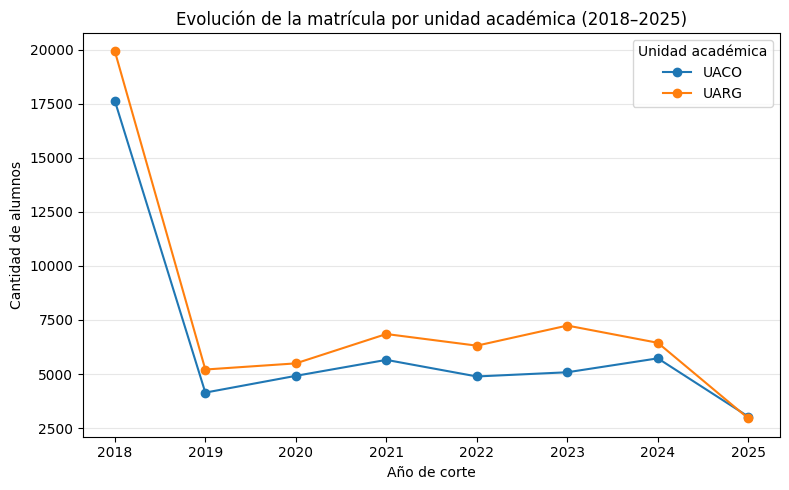

In [44]:

plt.figure(figsize=(8, 5))

for unidad in tabla_unidad_anio.index:
    plt.plot(
        tabla_unidad_anio.columns,
        tabla_unidad_anio.loc[unidad],
        marker="o",
        label=unidad
    )

plt.title("Evolución de la matrícula por unidad académica (2018–2025)")
plt.xlabel("Año de corte")
plt.ylabel("Cantidad de alumnos")
plt.xticks(tabla_unidad_anio.columns)
plt.legend(title="Unidad académica")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


El gráfico de líneas de alumnos por año y unidad académica muestra un pico inicial en 2018, seguido de una fuerte reducción e ingreso a un nivel estable a partir de 2019. UARG mantiene sistemáticamente mayor volumen de matrícula que UACO en todos los años, con diferencias moderadas y un descenso conjunto en 2025 asociado a datos aún incompletos.

## Exploración de carreras

Antes de construir tablas o gráficos de “Distribución de alumnos por carrera”, necesito ver:
- Cuántas carreras distintas hay en el dataset.
- Cuáles son las carreras más numerosas.
- Ver si el nombre de la carrera está mejor representado en `CARRERA` (código) o en `NOMBRE` (descripción).


In [31]:
# Cantidad de carreras y top de valores en CARRERA y NOMBRE

if "CARRERA" in df_eda.columns:
    print("Cantidad de valores distintos en CARRERA:", df_eda["CARRERA"].nunique())
    print("\nTop 15 carreras (columna CARRERA):")
    print(df_eda["CARRERA"].value_counts().head(15))

if "NOMBRE" in df_eda.columns:
    print("\nCantidad de valores distintos en NOMBRE:", df_eda["NOMBRE"].nunique())
    print("\nTop 15 nombres de carrera (columna NOMBRE):")
    print(df_eda["NOMBRE"].value_counts().head(15))


Cantidad de valores distintos en CARRERA: 77

Top 15 carreras (columna CARRERA):
CARRERA
74     8894
913    8273
912    7823
45     7433
93     6249
16     6008
88     4785
916    4743
46     3816
62     3528
23     2890
76     2889
89     2792
7      2775
84     2701
Name: count, dtype: int64

Cantidad de valores distintos en NOMBRE: 72

Top 15 nombres de carrera (columna NOMBRE):
NOMBRE
Licenciatura en Administración                                  9007
Licenciatura en Trabajo Social                                  8928
Licenciatura en Psicopedagogía                                  7433
Licenciatura en Enfermería                                      7144
Analista de Sistemas                                            6008
Tecnicatura Universitaria en Petróleo                           4785
Tecnicatura Universitario en Seguridad e Higiene en el Traba    4743
Tecnicatura en Gestión de Organizaciones                        4201
Enfermería Universitaria                                

En el período 2018–2025, las carreras con mayor cantidad de alumnos en UARG+UACO son Licenciatura en Administración, Trabajo Social, Psicopedagogía y Enfermería, seguidas por Analista de Sistemas y diversas Tecnicaturas (Petróleo, Seguridad e Higiene, Gestión de Organizaciones, Turismo, etc.)

## 4.3 Gráfico  Top 10 carreras por cantidad de alumnos (UARG + UACO)

En este gráfico muestro las 10 carreras con mayor cantidad de alumnos en el período 2018–2025, usando la columna `NOMBRE`. Esto permite identificar cuáles son las carreras más demandadas en el sistema.


In [46]:
# Top 10 carreras por cantidad de alumnos (total UARG + UACO)
top10_carreras = df_eda["NOMBRE"].value_counts().head(10)

top10_carreras


,count
NOMBRE,
Licenciatura en Administración,9007
Licenciatura en Trabajo Social,8928
Licenciatura en Psicopedagogía,7433
Licenciatura en Enfermería,7144
Analista de Sistemas,6008
Tecnicatura Universitaria en Petróleo,4785
Tecnicatura Universitario en Seguridad e Higiene en el Traba,4743
Tecnicatura en Gestión de Organizaciones,4201
Enfermería Universitaria,3816


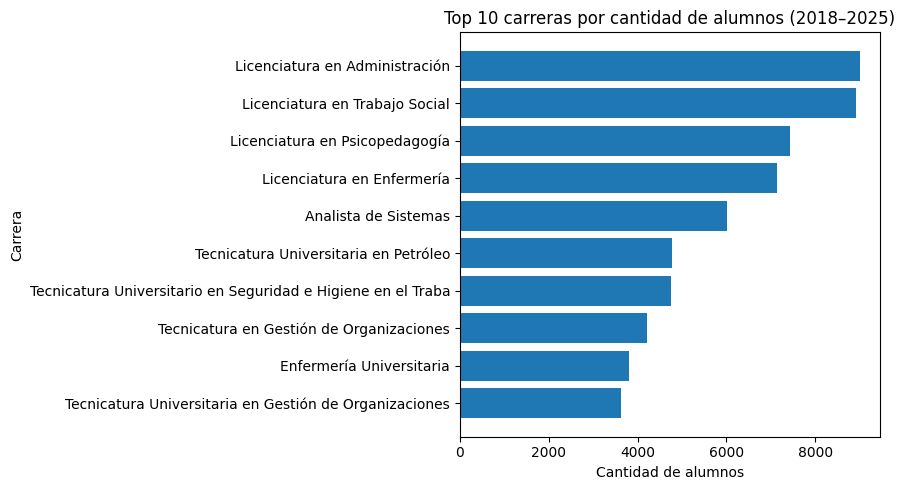

In [47]:
plt.figure(figsize=(9, 5))

# Damos vuelta el orden para que la barra más grande quede abajo (más prolijo)
plt.barh(top10_carreras.index[::-1], top10_carreras.values[::-1])

plt.title("Top 10 carreras por cantidad de alumnos (2018–2025)")
plt.xlabel("Cantidad de alumnos")
plt.ylabel("Carrera")
plt.tight_layout()
plt.show()


El gráfico de barras de las 10 carreras con mayor cantidad de alumnos muestra una distribución fuertemente concentrada: las licenciaturas en Administración, Trabajo Social, Psicopedagogía y Enfermería ocupan los primeros lugares, y son seguidas por Analista de Sistemas y varias tecnicaturas (Petróleo, Seguridad e Higiene, Gestión de Organizaciones, Enfermería Universitaria). Esto indica que una parte importante de la matrícula se agrupa en unas pocas carreras de alto peso relativo.

## 5 Distribución de alumnos por carrera


<a name="sis"></a>


En esta sección:
- Calculo la distribución total de alumnos por carrera (columna `NOMBRE`) en el período 2018–2025.
- Luego construyo una tabla de alumnos por carrera y unidad académica (UARG vs UACO), que después se puede usar para gráficos comparativos en el ICT.


In [32]:
# Top 15 carreras por cantidad de alumnos (total UARG + UACO)

top15_carreras_total = df_eda["NOMBRE"].value_counts().head(15)
top15_carreras_total


,count
NOMBRE,
Licenciatura en Administración,9007
Licenciatura en Trabajo Social,8928
Licenciatura en Psicopedagogía,7433
Licenciatura en Enfermería,7144
Analista de Sistemas,6008
Tecnicatura Universitaria en Petróleo,4785
Tecnicatura Universitario en Seguridad e Higiene en el Traba,4743
Tecnicatura en Gestión de Organizaciones,4201
Enfermería Universitaria,3816


Las Carreras más numerosas (UARG+UACO): Top 15 (total 2018–2025):

-**Las 4 grandes “licenciaturas sociales”:**

   - Lic. en Administración (9.007)

  - Lic. en Trabajo Social (8.928)

  - Lic. en Psicopedagogía (7.433)

  - Lic. en Enfermería (7.144)

**Tecnológicas / técnicas destacadas:**

  - Analista de Sistemas (6.008)

  - Tec. Univ. en Petróleo (4.785)

  - Tec. Univ. en Seguridad e Higiene en el Trabajo (4.743)

  - Tecnicaturas en Gestión de Organizaciones (suman 4.201 + 3.622 en dos variantes de nombre)

  - Tec. Univ. en Turismo (3.528)

  - Tec. Univ. en Acompañamiento Terapéutico (2.889)

**Otras con peso:**

  - Lic. en Higiene y Seguridad en el Trabajo (2.792)

  - Profesorados (Ciencias de la Educación, Primaria) ~2.7k cada una.

Tu matrícula se concentra en un núcleo fuerte de carreras sociales y de salud (Admin, Trabajo Social, Psicopedagogía, Enfermería) y un segundo bloque técnico/tecnológico (Sistemas, Petróleo, Seguridad e Higiene, Turismo, etc.).

In [33]:
# Tabla de alumnos por carrera (top 15) y unidad académica

# Me quedo solo con las 15 carreras más numerosas
carreras_top15 = top15_carreras_total.index

tabla_carrera_unidad = (
    df_eda[df_eda["NOMBRE"].isin(carreras_top15)]
    .groupby(["NOMBRE", "UNIDAD_ACADEMICA"])
    .size()
    .unstack("UNIDAD_ACADEMICA")
    .fillna(0)
    .astype(int)
    .sort_values(by=["UARG", "UACO"], ascending=False)
)

tabla_carrera_unidad


UNIDAD_ACADEMICA,UACO,UARG
NOMBRE,,
Licenciatura en Psicopedagogía,0,7433
Licenciatura en Enfermería,55,7089
Licenciatura en Administración,3939,5068
Enfermería Universitaria,145,3671
Analista de Sistemas,2358,3650
Tecnicatura Universitaria en Gestión de Organizaciones,0,3622
Licenciatura en Trabajo Social,6075,2853
Tecnicatura Universitaria en Acompañamiento Terapéutico,184,2705
Tecnicatura Universitaria en Turismo,1544,1984


El comportamiento de cómo se reparten esas carreras entre UARG y UACO

De la tabla por unidad:

**Carreras casi exclusivas de UARG (UACO casi 0):**

   - Licenciatura en Psicopedagogía → UARG 7.433, UACO 0

  - Licenciatura en Enfermería → UARG 7.089, UACO 55

  - Enfermería Universitaria → UARG 3.671, UACO 145

  - Tecnicatura Universitaria en Gestión de Organizaciones → UARG 3.622, UACO 0

**UARG tiene un perfil muy fuerte en salud y educación (Psicopedagogía, Enfermería, Profesorados) y en gestión.**

**Carreras casi exclusivas de UACO:**

  - Tecnicatura Universitaria en Petróleo → UACO 4.785, UARG 0

  - Tec. Univ. en Seguridad e Higiene en el Trabajo → UACO 4.743, UARG 0

  - Tecnicatura en Gestión de Organizaciones → UACO 4.201, UARG 0

  - Lic. en Higiene y Seguridad en el Trabajo → UACO 2.792, UARG 0

   - Profesorado en Ciencias de la Educación → UACO 2.775, UARG 0

   - Profesorado para la Educación Primaria → UACO 2.701, UARG 0

**UACO tiene una impronta muy marcada en tecnicaturas productivas y de seguridad (Petróleo, Higiene y Seguridad) y también en profesorados.**

**Carreras compartidas (presentes en ambas unidades):**

  - Licenciatura en Administración → UARG 5.068, UACO 3.939 (fuerte en las dos)

  - Licenciatura en Trabajo Social → UACO 6.075, UARG 2.853 (más fuerte en UACO, pero presente en ambas)

  - Analista de Sistemas → UARG 3.650, UACO 2.358

  - Tecnicatura Universitaria en Turismo → UARG 1.984, UACO 1.544

  - Tecnicatura Universitaria en Acompañamiento Terapéutico → UARG 2.705, UACO 184

### 5. Análisis específico: Analista de Sistemas (UARG vs UACO)

En esta sección filtro el dataset para quedarme solo con los registros de la carrera **"Analista de Sistemas"**, y analizo:

- Cantidad total de alumnos por unidad académica (UARG vs UACO).
- Evolución por año de corte (2018–2025) en cada unidad.



Para el análisis comparativo entre unidades académicas se selecciona la carrera **Analista de Sistemas** porque:

- Se dicta en ambas unidades académicas consideradas (**UARG** y **UACO**), lo que permite una comparación directa.
- Se ubica entre las carreras con mayor matrícula del sistema en el período 2018–2025.
- Presenta un perfil profesional claramente vinculado al área de informática y sistemas, coherente con los objetivos de la maestría y del futuro sistema de predicción de deserción.

Por estas razones, Analista de Sistemas se toma como **caso de estudio representativo** para explorar patrones de matrícula, perfil socioeconómico y avance académico entre UARG y UACO.


In [34]:
# Filtro el dataset solo para la carrera "Analista de Sistemas"

df_sis = df_eda[df_eda["NOMBRE"] == "Analista de Sistemas"].copy()

print("Forma de df_sis (Analista de Sistemas):", df_sis.shape)

print("\nCantidad de alumnos por unidad académica (solo Analista de Sistemas):")
print(df_sis["UNIDAD_ACADEMICA"].value_counts())


Forma de df_sis (Analista de Sistemas): (6008, 34)

Cantidad de alumnos por unidad académica (solo Analista de Sistemas):
UNIDAD_ACADEMICA
UARG    3650
UACO    2358
Name: count, dtype: int64


**Distribución por unidad:**

  - UARG: 3.650 alumnos (~60 %)
  - UACO: 2.358 alumnos (~40 %)

En el período 2018–2025, la carrera Analista de Sistemas registra un total de 6008 alumnos entre UARG y UACO. La UARG concentra aproximadamente el 60 % de la matrícula (3650 alumnos), mientras que la UACO reúne el 40 % restante (2358 alumnos), lo que muestra una presencia fuerte de la carrera en ambas unidades, con ligera predominancia en UARG

### 5.1 Evolución de la matrícula en Analista de Sistemas por año de corte

En esta parte analizo cómo se distribuye la matrícula de **Analista de Sistemas** por año de corte (2018–2025) y por unidad académica (UARG vs UACO). Esto permite ver si la carrera crece, se estabiliza o disminuye en cada unidad.


In [35]:
# 10.2 Tabla de Analista de Sistemas por unidad académica y año de corte

tabla_sis_unidad_anio = (
    df_sis
    .groupby(["UNIDAD_ACADEMICA", "ANIO_CORTE"])
    .size()
    .unstack("ANIO_CORTE")
    .fillna(0)
    .astype(int)
)

tabla_sis_unidad_anio


ANIO_CORTE,2018,2019,2020,2021,2022,2023,2024,2025
UNIDAD_ACADEMICA,,,,,,,,
UACO,1008,156,175,204,189,214,257,155
UARG,1252,268,296,375,341,392,470,256


En el 2018

 - UARG: 1252

 - UACO: 1008

Son valores muy altos comparados con el resto de los años. Eso suele indicar que el primer corte incluye un “stock” grande de alumnos ya activos antes del 2018.

- A partir de 2019 la matrícula se estabiliza en niveles más bajos, pero razonables y crecientes:

   - UACO: se mueve entre ~150 y ~250 alumnos por año.

   - UARG: se mueve entre ~260 y ~470 alumnos por año.
Hay una tendencia suave al crecimiento en ambas unidades (2019 → 2024).

- UARG siempre está por encima de UACO en cantidad de alumnos de Analista de Sistemas:

  - En todos los años 2018–2025, UARG tiene más alumnos que UACO.

  - La diferencia no es extrema, pero UARG está claramente por encima (≈ 1,3–1,8 veces).

- 2025 baja en ambas (UARG 256, UACO 155):
Muy probablemente porque es un año aún en curso / corte incompleto.

## 6.2 Perfil socioeconómico de Analista de Sistemas

En esta sección analizo el perfil socioeconómico de los estudiantes de **Analista de Sistemas** a partir de las variables:

- `ACT ECON`: actividad económica declarada.
- `HS TRAB`: rango de horas de trabajo.
- `CANT HIJOS`: cantidad de hijos.

Primero exploro los valores existentes en estas columnas para entender cómo están codificados y luego construir indicadores resumidos (por ejemplo, proporción que trabaja, proporción con hijos, etc.) comparando UARG vs UACO.


In [36]:
# Exploración de variables socioeconómicas en Analista de Sistemas

print("Valores en ACT ECON (top 10):")
print(df_sis["ACT ECON"].value_counts(dropna=False).head(10))

print("\nValores en HS TRAB (top 10):")
print(df_sis["HS TRAB"].value_counts(dropna=False).head(10))

print("\nValores en CANT HIJOS (top 10):")
print(df_sis["CANT HIJOS"].value_counts(dropna=False).head(10))


Valores en ACT ECON (top 10):
ACT ECON
\\N                                                           5148
Comercio                                                       153
Enseñanza                                                      153
Servicios públicos y privados part.                            133
Entes Civiles del Estado                                        80
Fuerzas Armadas y de Seguridad                                  71
Industria y Construcción                                        39
Bancos, Bolsas, Seguros y Sociedades Financieras                38
Servicios sociales y de salud                                   36
Otras actividades de servicios comunit., soc. y personales      28
Name: count, dtype: int64

Valores en HS TRAB (top 10):
HS TRAB
\\N                 4217
no trabaja           626
de 36 o más hs.      517
de 21 a 35 hs.       341
hasta 20 hs.         295
de 21 a 35 hs.        12
Name: count, dtype: int64

Valores en CANT HIJOS (top 10):
CANT HIJOS
\\N    

**En la carrera Analista de Sistemas,** la mayoría de los estudiantes no declara actividad económica registrada en el sistema SIU (más del 80 % de los registros aparecen sin dato en ACT ECON). Entre quienes sí declaran una ocupación, predominan actividades vinculadas al comercio, la enseñanza y los servicios públicos y privados, con menor participación de sectores como industria, construcción, salud y entidades financieras

**En la variable HS TRAB**, que indica el rango de horas de trabajo, se observa nuevamente un alto porcentaje de registros sin información declarada. Entre los casos con dato, se distingue un grupo de estudiantes que no trabaja formalmente y otro grupo relevante que combina la carrera con jornadas laborales de tiempo parcial (hasta 20 o de 21 a 35 horas semanales), además de un subconjunto que trabaja 36 horas o más por semana. Esto sugiere que una proporción no menor de estudiantes cursa la carrera en paralelo con actividades laborales de cierta intensidad

**En CANT HIJOS** también predomina la ausencia de información (la mayoría de los registros aparece como \\N). Dentro del subconjunto que sí tiene dato, se observa que la mayor parte declara no tener hijos, seguido por estudiantes que reportan uno o dos hijos. Esta variable puede utilizarse de manera agregada para distinguir entre estudiantes con responsabilidades familiares y aquellos sin hijos

### (ajuste) Recalculo TRABAJA corrigiendo los valores sin dato

Ajusto la construcción del indicador `TRABAJA` para distinguir mejor:

- `No`: cuando `HS TRAB` indica explícitamente "no trabaja".
- `Sí`: cuando `HS TRAB` indica algún rango de horas (hasta 20, 21–35, 36 o más).
- `NaN`: cuando `HS TRAB` está vacío, es `\\N` u otro código sin información.

De esta forma, la proporción de estudiantes que trabajan se calcula solo entre quienes tienen dato válido.



In [38]:
# Recalculo TRABAJA con una lógica más cuidadosa

def clasificar_trabajo_mejorado(valor):
    if pd.isna(valor):
        return np.nan

    v = str(valor).strip().lower()

    # Casos sin dato: códigos tipo \n, \N o similares
    if v.startswith("\\") or v in ["", "nan"]:
        return np.nan

    if "no trabaja" in v:
        return "No"

    # Si menciona "hs" (horas) interpretamos que trabaja
    if "hs" in v:
        return "Sí"

    # Cualquier otra cosa rara -> sin dato
    return np.nan

df_sis["TRABAJA"] = df_sis["HS TRAB"].apply(clasificar_trabajo_mejorado)

print("Distribución global de TRABAJA (con corrección):")
print(df_sis["TRABAJA"].value_counts(dropna=False))


Distribución global de TRABAJA (con corrección):
TRABAJA
NaN    4217
Sí     1165
No      626
Name: count, dtype: int64


Solo 1791 alumnos (1165 + 626) tienen información clara sobre trabajo → aprox. 30 % del total.

**Dentro de esos que tienen dato:**

  - 1165 / 1791 ≈ 65 % declaran que trabajan.

  - 626 / 1791 ≈ 35 % declaran que no trabajan.

En la carrera Analista de Sistemas, aproximadamente un 30 % de los estudiantes tiene registrada información válida sobre su situación laboral en la variable HS TRAB. Dentro de ese grupo, alrededor de dos tercios declaran que trabajan mientras cursan la carrera, y un tercio declara que no trabaja. El alto porcentaje de registros sin información limita la posibilidad de generalizar este perfil al total de la matrícula, pero permite caracterizar al subconjunto de estudiantes que sí declara su situación laboral

### Comparación de TRABAJA (Sí/No) entre UARG y UACO

A continuación comparo la situación laboral de los estudiantes de Analista de Sistemas que tienen información válida en `HS TRAB`, desagregando por unidad académica (UARG vs UACO). Esto permite ver si una unidad concentra una mayor proporción de estudiantes que trabajan mientras cursan.


In [39]:
# Me quedo solo con los alumnos de Sistemas que tienen dato válido en TRABAJA
df_sis_trab = df_sis[df_sis["TRABAJA"].notna()].copy()

print("Forma de df_sis_trab (solo con dato de TRABAJA):", df_sis_trab.shape)

# Tabla de conteos TRABAJA x UNIDAD_ACADEMICA
tabla_trab_unidad = pd.crosstab(df_sis_trab["UNIDAD_ACADEMICA"], df_sis_trab["TRABAJA"])
print("\nConteo de estudiantes por unidad académica y TRABAJA:")
print(tabla_trab_unidad)

# Tabla de proporciones por unidad (fila suma 100 %)
tabla_trab_unidad_pct = pd.crosstab(
    df_sis_trab["UNIDAD_ACADEMICA"], df_sis_trab["TRABAJA"], normalize="index"
) * 100

print("\nPorcentaje de estudiantes (con dato) por unidad académica y TRABAJA:")
print(tabla_trab_unidad_pct.round(2))


Forma de df_sis_trab (solo con dato de TRABAJA): (1791, 35)

Conteo de estudiantes por unidad académica y TRABAJA:
TRABAJA            No   Sí
UNIDAD_ACADEMICA          
UACO              399  656
UARG              227  509

Porcentaje de estudiantes (con dato) por unidad académica y TRABAJA:
TRABAJA             No    Sí
UNIDAD_ACADEMICA            
UACO             37.82 62.18
UARG             30.84 69.16


**En ambas unidades, la mayoría de los alumnos de Sistemas que tienen dato trabajan.**

  - UACO: ~62 % trabaja.

  - UARG: ~69 % trabaja.

**La proporción de estudiantes que trabajan es algo mayor en UARG.**

  - Diferencia moderada pero consistente: ~7 puntos porcentuales más de “Sí trabaja” en UARG.

**Recordatorio importante:**
  - Todo esto es solo sobre el 30 % que tiene datos válidos en HS TRAB. No es toda la matrícula, es “de los que declararon algo”.

#### Gráfico B1. Situación laboral de los estudiantes de Analista de Sistemas (UARG vs UACO)

En este gráfico comparo, entre los estudiantes de Analista de Sistemas que tienen información válida en `HS TRAB`, la proporción de quienes declaran trabajar y no trabajar en cada unidad académica (UARG y UACO).


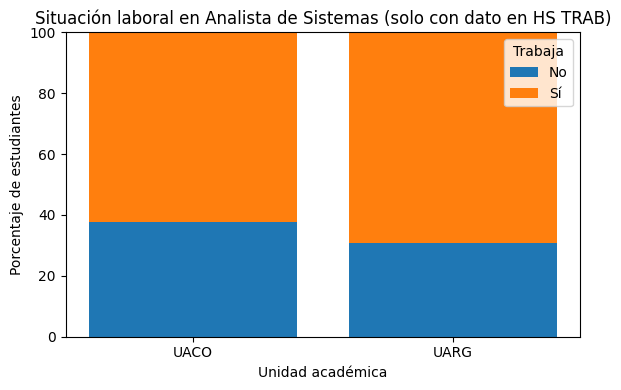

In [49]:
# Tabla de porcentajes TRABAJA x unidad académica


# Gráfico: barras apiladas al 100 %

plt.figure(figsize=(6, 4))

bottom = np.zeros(len(tabla_trab_unidad_pct))
for estado in ["No", "Sí"]:
    valores = tabla_trab_unidad_pct[estado].values
    plt.bar(
        tabla_trab_unidad_pct.index,
        valores,
        bottom=bottom,
        label=estado
    )
    bottom += valores

plt.title("Situación laboral en Analista de Sistemas (solo con dato en HS TRAB)")
plt.ylabel("Porcentaje de estudiantes")
plt.xlabel("Unidad académica")
plt.ylim(0, 100)
plt.legend(title="Trabaja")
plt.tight_layout()
plt.show()


Entre los estudiantes con información válida sobre horas de trabajo, la mayoría declara trabajar en ambas unidades académicas, con una proporción algo mayor en la UARG (aprox. 69 % trabaja) que en la UACO (≈ 62 %), mientras que el resto declara no trabajar.

##  Indicador TIENE_HIJOS (Sí/No) en Analista de Sistemas

A partir de la variable `CANT HIJOS` construyo el indicador `TIENE_HIJOS`:

- `No`: estudiantes que declaran no tener hijos (por ejemplo, "No tiene" o valor 0).
- `Sí`: estudiantes que declaran uno o más hijos.
- `NaN`: registros sin información (`\\N` u otros valores vacíos).

Luego comparo la proporción de estudiantes con hijos entre UARG y UACO, solo entre quienes tienen dato válido.


In [40]:
# Creo indicador TIENE_HIJOS en df_sis

def clasificar_hijos(valor):
    if pd.isna(valor):
        return np.nan

    v = str(valor).strip().lower()

    # Casos sin dato: códigos tipo \N
    if v.startswith("\\") or v in ["", "nan"]:
        return np.nan

    # Sin hijos
    if v in ["no tiene", "0", "0.0"]:
        return "No"

    # Cualquier otro valor (Uno, Dos, 1, 2, etc.) lo tomo como "tiene hijos"
    return "Sí"

df_sis["TIENE_HIJOS"] = df_sis["CANT HIJOS"].apply(clasificar_hijos)

print("Distribución global de TIENE_HIJOS en Analista de Sistemas:")
print(df_sis["TIENE_HIJOS"].value_counts(dropna=False))


Distribución global de TIENE_HIJOS en Analista de Sistemas:
TIENE_HIJOS
NaN    5095
Sí      469
No      444
Name: count, dtype: int64


**Resultados:**

  - NaN (sin dato): 5095

  - Sí (tiene hijos): 469

  - No (no tiene hijos): 444

Total = 6008 alumnos de Analista de Sistemas.

1. Muchísimo missing: 5095 de 6008 no tienen información → más del 84 % de la carrera no declara nada en CANT HIJOS.

**Igual que con TRABAJA, esto significa:**
No podemos generalizar al total de la matrícula, solo al subconjunto que sí respondió algo.

2. Entre quienes tienen dato, el grupo está bastante equilibrado: Si miramos solo los que tienen información (469 + 444 = 913 alumnos):

  - 469 / 913 ≈ 51 % → con hijos

  - 444 / 913 ≈ 49 % → sin hijos


Entre los estudiantes de Analista de Sistemas que sí tienen información registrada sobre CANT HIJOS, el grupo se encuentra prácticamente dividido en mitades: alrededor de la mitad declara tener uno o más hijos y la otra mitad declara no tener hijos.

###  Comparación de TIENE_HIJOS (Sí/No) entre UARG y UACO

Ahora comparo la presencia de responsabilidades familiares entre los estudiantes de Analista de Sistemas que tienen información válida en `CANT HIJOS`, desagregando por unidad académica (UARG vs UACO). Esto permite ver si una de las unidades concentra una mayor proporción de estudiantes con hijos.


In [41]:
# Me quedo solo con los alumnos de Sistemas que tienen dato válido en TIENE_HIJOS
df_sis_hijos = df_sis[df_sis["TIENE_HIJOS"].notna()].copy()

print("Forma de df_sis_hijos (solo con dato de TIENE_HIJOS):", df_sis_hijos.shape)

# Conteo TIENE_HIJOS x UNIDAD_ACADEMICA
tabla_hijos_unidad = pd.crosstab(df_sis_hijos["UNIDAD_ACADEMICA"], df_sis_hijos["TIENE_HIJOS"])
print("\nConteo de estudiantes por unidad académica y TIENE_HIJOS:")
print(tabla_hijos_unidad)

# Porcentajes por unidad académica (fila suma 100 %)
tabla_hijos_unidad_pct = pd.crosstab(
    df_sis_hijos["UNIDAD_ACADEMICA"], df_sis_hijos["TIENE_HIJOS"], normalize="index"
) * 100

print("\nPorcentaje de estudiantes (con dato) por unidad académica y TIENE_HIJOS:")
print(tabla_hijos_unidad_pct.round(2))


Forma de df_sis_hijos (solo con dato de TIENE_HIJOS): (913, 36)

Conteo de estudiantes por unidad académica y TIENE_HIJOS:
TIENE_HIJOS        No   Sí
UNIDAD_ACADEMICA          
UACO              251  256
UARG              193  213

Porcentaje de estudiantes (con dato) por unidad académica y TIENE_HIJOS:
TIENE_HIJOS         No    Sí
UNIDAD_ACADEMICA            
UACO             49.51 50.49
UARG             47.54 52.46


**Porcentajes (dentro de cada unidad):**

  - UACO:

      - No: 49,51 %

      - Sí: 50,49 %

   - UARG:

      - No: 47,54 %

      - Sí: 52,46 %

En ambas unidades, entre quienes tienen dato, la distribución es casi mitad y mitad:

- Aproximadamente la mitad de los estudiantes tiene hijos y la otra mitad no.

En UARG la proporción de estudiantes con hijos es apenas un poco mayor (52,5 % vs 50,5 % en UACO), pero la diferencia es muy chica.

Tener en cueta que, trabajamos sobre el subconjunto con dato (913 de 6008), así que siempre hay que mantener esa aclaración.

### Gráfico Estudiantes de Analista de Sistemas con hijos (UARG vs UACO)

En este gráfico comparo, entre los estudiantes de Analista de Sistemas que tienen información válida en `CANT HIJOS`, la proporción de quienes declaran tener hijos y no tener hijos en cada unidad académica.


TIENE_HIJOS         No    Sí
UNIDAD_ACADEMICA            
UACO             49.51 50.49
UARG             47.54 52.46


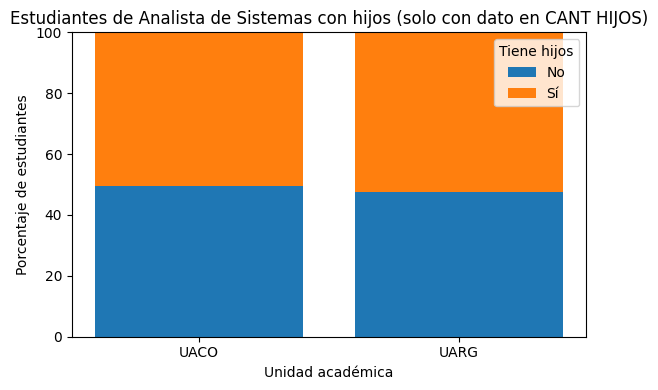

In [50]:
# Tabla de porcentajes TIENE_HIJOS x unidad académica
tabla_hijos_unidad_pct = pd.crosstab(
    df_sis_hijos["UNIDAD_ACADEMICA"],
    df_sis_hijos["TIENE_HIJOS"],
    normalize="index"
) * 100

print(tabla_hijos_unidad_pct.round(2))

# Gráfico: barras apiladas al 100 %
plt.figure(figsize=(6, 4))

bottom = np.zeros(len(tabla_hijos_unidad_pct))
for estado in ["No", "Sí"]:
    valores = tabla_hijos_unidad_pct[estado].values
    plt.bar(
        tabla_hijos_unidad_pct.index,
        valores,
        bottom=bottom,
        label=estado
    )
    bottom += valores

plt.title("Estudiantes de Analista de Sistemas con hijos (solo con dato en CANT HIJOS)")
plt.ylabel("Porcentaje de estudiantes")
plt.xlabel("Unidad académica")
plt.ylim(0, 100)
plt.legend(title="Tiene hijos")
plt.tight_layout()
plt.show()


Tanto en UARG como en UACO, entre los estudiantes con información registrada, la proporción de quienes tienen hijos y quienes no los tienen es prácticamente equilibrada (alrededor de 50/50), con ligeras variaciones a favor de “tiene hijos” en ambas unidades.

## 6.3 Avance académico en Analista de Sistemas (variable PORCENTAJE)

Como aproximación al avance académico, utilizo la variable `PORCENTAJE`, que indica el porcentaje de avance del estudiante en su plan de estudios. En esta sección:

- Exploro la distribución de `PORCENTAJE` en Analista de Sistemas.
- Veo cuántos registros tienen dato válido.
- Comparo el avance promedio entre UARG y UACO.


In [51]:
# Exploración de PORCENTAJE en Analista de Sistemas

print("Cantidad de alumnos de Sistemas:", df_sis.shape[0])
print("Con PORCENTAJE no nulo:", df_sis["PORCENTAJE"].notna().sum())

print("\nResumen estadístico global de PORCENTAJE:")
print(df_sis["PORCENTAJE"].describe())

print("\nResumen de PORCENTAJE por unidad académica:")
print(
    df_sis.groupby("UNIDAD_ACADEMICA")["PORCENTAJE"]
    .describe()
    .round(2)
)


Cantidad de alumnos de Sistemas: 6008
Con PORCENTAJE no nulo: 895

Resumen estadístico global de PORCENTAJE:
count   895.00
mean      0.19
std       0.30
min       0.00
25%       0.00
50%       0.04
75%       0.27
max       1.10
Name: PORCENTAJE, dtype: float64

Resumen de PORCENTAJE por unidad académica:
                  count  mean  std  min  25%  50%  75%  max
UNIDAD_ACADEMICA                                           
UACO             331.00  0.20 0.31 0.00 0.00 0.04 0.22 1.10
UARG             564.00  0.19 0.29 0.00 0.00 0.04 0.27 1.10


**Cantidad de alumnos**

  - Alumnos de Sistemas: 6008

  - Con PORCENTAJE no nulo: 895

Solo ~15 % de los alumnos de Analista de Sistemas tiene registrado el porcentaje de avance.
Igual que con trabajo/hijos: hay mucho missing, así que siempre hay que aclarar que hablamos del subconjunto con dato.

**Distribución global de PORCENTAJE**

 - mean ≈ 0,19 → avance promedio ≈ 19 % del plan.

- median (50%) = 0,04 → la mitad de los alumnos con dato tiene 4 % o menos de avance.

- 25% = 0 → al menos el 25 % está prácticamente en cero.

- 75% ≈ 0,27 → el 75 % está por debajo del 27 % de avance.

 - max = 1,10 → 110 % → hay algunos datos que superan 1 (probable carga errónea/outlier o interpretaciones especiales de la fórmula).

La distribución está muy sesgada hacia valores bajos (muchos cerca de 0, pocos muy avanzados).

La media (0,19) queda “arrastrada” por algunos valores altos, pero la mediana (0,04) nos cuenta que la mayoría está en etapas iniciales de la carrera.

**Comparación UARG vs UACO**

**UACO**

 - count: 331 alumnos con dato.

 - mean: 0,20 → 20 % de avance promedio.

 - median: 0,04

 - 75%: 0,22

**UARG**

 - count: 564 alumnos con dato.

 - mean: 0,19 → 19 % de avance promedio.

 - median: 0,04

 - 75%: 0,27


El patrón es casi idéntico en las dos unidades:

- Mediana igual (0,04).

- Medias muy parecidas (0,19 vs 0,20).

UARG tiene más casos con dato (564 vs 331), y un percentil 75 algo mayor (0,27 vs 0,22), lo que sugiere que:

- En UARG hay un poquito más de estudiantes con avances intermedios/altos,

- pero en general el nivel de avance es bajo en ambas unidades dentro del grupo con dato.

### Gráfico Avance académico en Analista de Sistemas (boxplot de `PORCENTAJE` por unidad académica)

En este gráfico muestro la distribución del porcentaje de avance (`PORCENTAJE`) de los estudiantes de Analista de Sistemas que tienen este dato cargado, comparando UARG y UACO. El boxplot permite visualizar mediana, dispersión y posibles valores extremos en cada unidad académica.


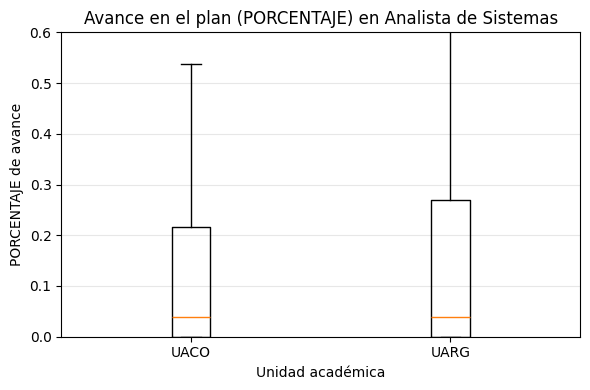

In [53]:
# Me quedo solo con Sistemas con PORCENTAJE no nulo
df_sis_por = df_sis[df_sis["PORCENTAJE"].notna()].copy()

datos_uaco = df_sis_por[df_sis_por["UNIDAD_ACADEMICA"] == "UACO"]["PORCENTAJE"]
datos_uarg = df_sis_por[df_sis_por["UNIDAD_ACADEMICA"] == "UARG"]["PORCENTAJE"]

plt.figure(figsize=(6, 4))

plt.boxplot(
    [datos_uaco, datos_uarg],
    tick_labels=["UACO", "UARG"],   # evita el warning de labels
    showfliers=False                # no dibuja los outliers
)

plt.title("Avance en el plan (PORCENTAJE) en Analista de Sistemas")
plt.ylabel("PORCENTAJE de avance")
plt.xlabel("Unidad académica")
plt.ylim(0, 0.6)                    # zoom en la zona donde está el 75% de los datos
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


Porcentaje de avance en Analista de Sistemas por unidad académica.
El boxplot muestra que la distribución del avance en el plan (PORCENTAJE) es muy similar en UARG y UACO: en ambas unidades la mayoría de los estudiantes con dato se concentra en valores bajos de avance, con medianas cercanas a 0,04 y un 75 % de los casos por debajo de aproximadamente un 25–27 % del plan.

## 6.4. Antigüedad en la carrera para Analista de Sistemas

Para aproximar el tiempo que los estudiantes llevan en la carrera, construyo la variable `ANTIG_CARR`, definida como la diferencia entre el año de corte (`ANIO_CORTE`) y el año de ingreso a la carrera (`AÑO_ING_Carrera`). Esto permite identificar qué proporción de estudiantes se encuentra en etapas más recientes


In [54]:
# Creo la variable de antigüedad en años en la carrera

# Aseguro que AÑO_ING_Carrera sea numérico
df_sis["AÑO_ING_Carrera_NUM"] = pd.to_numeric(df_sis["AÑO_ING_Carrera"], errors="coerce")

# Calculo antigüedad: año de corte - año de ingreso
df_sis["ANTIG_CARR"] = df_sis["ANIO_CORTE"] - df_sis["AÑO_ING_Carrera_NUM"]

# Limpio casos imposibles: negativos o > 30 años los marco como NaN
df_sis.loc[(df_sis["ANTIG_CARR"] < 0) | (df_sis["ANTIG_CARR"] > 30), "ANTIG_CARR"] = np.nan

print("Cantidad con ANTIG_CARR no nulo:", df_sis["ANTIG_CARR"].notna().sum())

print("\nResumen global de ANTIG_CARR:")
print(df_sis["ANTIG_CARR"].describe())

print("\nResumen de ANTIG_CARR por unidad académica:")
print(
    df_sis.groupby("UNIDAD_ACADEMICA")["ANTIG_CARR"]
    .describe()
    .round(2)
)


Cantidad con ANTIG_CARR no nulo: 579

Resumen global de ANTIG_CARR:
count   579.00
mean      5.55
std       7.07
min       0.00
25%       0.00
50%       2.00
75%       8.50
max      30.00
Name: ANTIG_CARR, dtype: float64

Resumen de ANTIG_CARR por unidad académica:
                  count  mean  std  min  25%  50%   75%   max
UNIDAD_ACADEMICA                                             
UACO             204.00  6.56 7.56 0.00 0.00 3.00 11.00 30.00
UARG             375.00  4.99 6.74 0.00 0.00 2.00  7.00 25.00


Tenemos 579 alumnos de Sistemas con ANTIG_CARR no nulo sobre 6008 → menos del 10 %.
**Antigüedad global en Analista de Sistemas**

**ANTIG_CARR (años desde ingreso a carrera hasta año de corte):**

 - Media ≈ 5,55 años

- Mediana = 2 años

 - Q1 = 0 → al menos el 25 % son muy recientes (0 años de antigüedad en el corte).

- Q3 = 8,5 → el 25 % superior tiene 8,5 años o más en la carrera.

Máximo = 30 años.

**Hay dos grupos:**

1. Un grupo grande de estudiantes recientes (0–2 años).

2. Un grupo importante de estudiantes muy antiguos (más de 8–10 años, algunos con hasta 30 años en el sistema).

Eso sugiere presencia de “trayectorias largas” o alumnos que quedan muchos años sin egresar.

**UACO vs UARG**

**UACO**

- 204 alumnos con dato.

- Media: 6,56 años.

- Mediana: 3 años.

- Q3: 11 años.

- Máx: 30.

**UARG**

- 375 alumnos con dato.

- Media: 4,99 años.

- Mediana: 2 años.

- Q3: 7 años.

- Máx: 25.

En el subconjunto con dato, los alumnos de Sistemas en UACO tienen, en promedio, más antigüedad que los de UARG.

En UACO, el 25 % más antiguo tiene 11 años o más en la carrera; en UARG, el 25 % más antiguo tiene 7 años o más.

Dicho en criollo: en UACO parece haber más “estudiantes crónicos” (trayectorias muy largas), mientras que en UARG la distribución es algo más concentrada en antigüedades moderadas.

### Agrupación de la antigüedad en tramos (0–2, 3–4, 5+ años)

Para facilitar la interpretación, agrupo la antigüedad en la carrera (`ANTIG_CARR`) en tres categorías:

- `0–2 años`: estudiantes recientes.
- `3–4 años`: trayectorias intermedias.
- `5 o más años`: trayectorias largas.

Luego comparo la distribución de estos grupos entre UARG y UACO, considerando solo los casos con `ANTIG_CARR` válido.
*texto en cursiva*

In [55]:
# Agrupo ANTIG_CARR en categorías

# Me quedo solo con los alumnos con ANTIG_CARR no nulo
df_sis_antig = df_sis[df_sis["ANTIG_CARR"].notna()].copy()

# Defino función de clasificación
def clasificar_antiguedad(a):
    if a <= 2:
        return "0–2 años"
    elif a <= 4:
        return "3–4 años"
    else:
        return "5 o más años"

df_sis_antig["ANTIG_CARR_GRUPO"] = df_sis_antig["ANTIG_CARR"].apply(clasificar_antiguedad)

print("Distribución global de grupos de antigüedad:")
print(df_sis_antig["ANTIG_CARR_GRUPO"].value_counts())

# Tabla de conteos por unidad académica
tabla_antig_unidad = pd.crosstab(
    df_sis_antig["UNIDAD_ACADEMICA"],
    df_sis_antig["ANTIG_CARR_GRUPO"]
)

print("\nConteo por unidad académica y grupo de antigüedad:")
print(tabla_antig_unidad)

# Tabla de porcentajes por unidad (cada fila suma 100 %)
tabla_antig_unidad_pct = pd.crosstab(
    df_sis_antig["UNIDAD_ACADEMICA"],
    df_sis_antig["ANTIG_CARR_GRUPO"],
    normalize="index"
) * 100

print("\nPorcentaje por unidad académica y grupo de antigüedad:")
print(tabla_antig_unidad_pct.round(2))


Distribución global de grupos de antigüedad:
ANTIG_CARR_GRUPO
0–2 años        294
5 o más años    216
3–4 años         69
Name: count, dtype: int64

Conteo por unidad académica y grupo de antigüedad:
ANTIG_CARR_GRUPO  0–2 años  3–4 años  5 o más años
UNIDAD_ACADEMICA                                  
UACO                    94        21            89
UARG                   200        48           127

Porcentaje por unidad académica y grupo de antigüedad:
ANTIG_CARR_GRUPO  0–2 años  3–4 años  5 o más años
UNIDAD_ACADEMICA                                  
UACO                 46.08     10.29         43.63
UARG                 53.33     12.80         33.87


## Gráfico Tramos de antigüedad en Analista de Sistemas por unidad académica

El siguiente gráfico muestra, para los estudiantes de Analista de Sistemas con dato válido de antigüedad, la distribución porcentual en tres tramos: 0–2 años, 3–4 años y 5 o más años, comparando UARG y UACO.


```
# Tiene formato de código
```



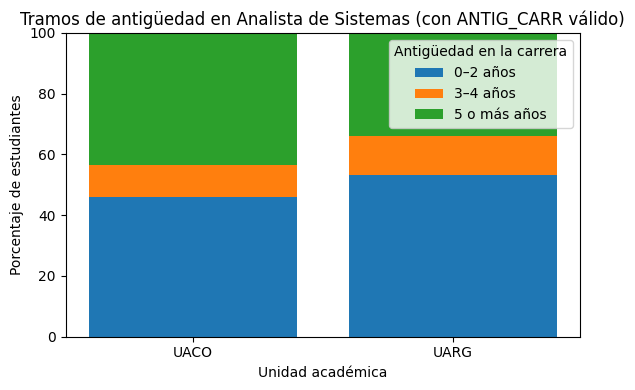

In [56]:
# Aseguro el orden de las columnas
orden_grupos = ["0–2 años", "3–4 años", "5 o más años"]
tabla_antig_plot = tabla_antig_unidad_pct[orden_grupos]

plt.figure(figsize=(6, 4))

bottom = np.zeros(len(tabla_antig_plot))

for grupo in orden_grupos:
    valores = tabla_antig_plot[grupo].values
    plt.bar(
        tabla_antig_plot.index,
        valores,
        bottom=bottom,
        label=grupo
    )
    bottom += valores

plt.title("Tramos de antigüedad en Analista de Sistemas (con ANTIG_CARR válido)")
plt.ylabel("Porcentaje de estudiantes")
plt.xlabel("Unidad académica")
plt.ylim(0, 100)
plt.legend(title="Antigüedad en la carrera")
plt.tight_layout()
plt.show()


El gráfico muestra que, entre los estudiantes de Analista de Sistemas con dato de antigüedad, UARG concentra una mayor proporción de alumnos recientes (0–2 años), mientras que en UACO aumenta el peso relativo de las trayectorias largas (5 años o más). En ambas unidades el grupo intermedio (3–4 años) es minoritario

## 6 Limitaciones de los Datos
<a name="limitaciones"></a>



Al interpretar los resultados del EDA es necesario considerar algunas limitaciones del propio registro de datos en SIU-Guaraní:

- **Alto porcentaje de valores faltantes en variables clave**  
  En las variables socioeconómicas (`ACT ECON`, `HS TRAB`, `CANT HIJOS`) y académicas (`PORCENTAJE`, `AÑO_ING_Carrera`) la proporción de valores `\\N` o vacíos es elevada (en algunos casos superior al 80 %). Por este motivo, los análisis de situación laboral, responsabilidades familiares y antigüedad en la carrera se realizan únicamente sobre el subconjunto de estudiantes que tiene información válida, sin pretensión de generalizar al total de la matrícula.

- **Ausencia de imputación de valores faltantes**  
  Dado el nivel de missing y la falta de variables auxiliares confiables para predecir estos valores, se decidió no aplicar técnicas de imputación. En su lugar, se recodificaron explícitamente los códigos de “sin dato” y se trabajó con indicadores binarios (por ejemplo, `TRABAJA`, `TIENE_HIJOS`), informando siempre el tamaño del subconjunto con dato disponible.

- **Presencia de valores atípicos en variables de avance**  
  En la variable `PORCENTAJE` se detectaron algunos casos con valores superiores a 1 (por ejemplo, 1,10), que se consideran posibles errores de carga o situaciones particulares. Estos valores se mantuvieron en el dataset para no alterar la información original, aunque se ajustó la escala de los gráficos (boxplot) para mejorar la legibilidad de la distribución central.

- **Cobertura parcial de antigüedad en la carrera**  
  La variable de antigüedad (`ANTIG_CARR`), construida a partir de `ANIO_CORTE` y `AÑO_ING_Carrera`, solo está disponible para una fracción menor de los estudiantes de Analista de Sistemas. Por lo tanto, los resultados sobre trayectorias cortas o largas deben interpretarse como una aproximación a partir de un subconjunto de casos, y no como una descripción exhaustiva de toda la población.


## 7. Síntesis del EDA para la carrera Analista de Sistemas (UARG vs UACO)
<a name="sintesis"></a>



A partir de la unificación de los datos de alumnos de UARG y UACO para el período 2018–2025, se analizaron en detalle los registros correspondientes a la carrera **Analista de Sistemas**, comparando ambas unidades académicas.

En términos de **volumen de matrícula**, Analista de Sistemas se ubica entre las carreras con mayor cantidad de alumnos del sistema. En el período analizado se registran 6008 inscripciones, distribuidas en 3650 alumnos en la UARG y 2358 en la UACO. La serie histórica por año de corte muestra que la matrícula de la carrera se mantiene relativamente estable, con ligera predominancia de la UARG sobre la UACO.

En el **perfil socioeconómico**, las variables de actividad económica y horas de trabajo presentan un alto porcentaje de valores faltantes, pero permiten caracterizar al subconjunto con información disponible. Entre los estudiantes de Analista de Sistemas que tienen datos válidos en `HS TRAB` (1791 casos), alrededor de dos tercios declaran trabajar mientras cursan la carrera, con una proporción levemente mayor en la UARG (≈ 69 % trabaja) que en la UACO (≈ 62 %). En `CANT HIJOS`, la información también es parcial (913 casos con dato), y dentro de ese grupo la distribución entre estudiantes con hijos y sin hijos es prácticamente equilibrada en las dos unidades, lo que indica que una fracción relevante de la matrícula compatibiliza estudios con responsabilidades familiares.

En cuanto al **avance académico**, la variable `PORCENTAJE` de avance en el plan está disponible para unos 895 estudiantes (aprox. 15 % de la matrícula de la carrera). La distribución de este indicador es marcadamente asimétrica hacia valores bajos: la mediana es cercana a 0,04 y la mayoría de los estudiantes se concentra en tramos de avance reducidos, tanto en UARG como en UACO. Los boxplots muestran que las distribuciones de avance en ambas unidades son muy similares, con diferencias mínimas.

Finalmente, el análisis de **antigüedad en la carrera** (`ANTIG_CARR`) sobre los 579 estudiantes con este dato revela la coexistencia de cohortes recientes (0–2 años de permanencia) con un conjunto importante de trayectorias prolongadas (5 o más años). La UARG presenta una proporción ligeramente mayor de estudiantes recientes, mientras que la UACO registra un peso relativo más alto de trayectorias largas, lo que puede asociarse a una mayor presencia de “estudiantes crónicos” en esta unidad académica.

En conjunto, estos resultados aportan una caracterización inicial de la carrera Analista de Sistemas en las unidades UARG y UACO, integrando volumen de matrícula, aspectos socioeconómicos y evolución académica. Esta información constituye una base para el diseño de indicadores de seguimiento y futuras estrategias de intervención orientadas a la detección temprana de riesgo de deserción.


<a name="futuro"></a>
## 8 Trabajo futuro y proyección del análisis

A partir de este EDA comparativo surgen varias líneas de trabajo futuro:

- **Profundizar el análisis académico por materia y cohorte.**  
  Incorporar variables de rendimiento (materias aprobadas, tasas de aprobación/desaprobación por asignatura y por año) para identificar posibles cuellos de botella en el avance de los estudiantes, diferenciando UARG y UACO.

- **Mejorar la calidad y cobertura de las variables socioeconómicas y de trayectoria.**  
  Revisar los procesos de carga en SIU-Guaraní para reducir la proporción de valores faltantes en variables como `HS TRAB`, `CANT HIJOS`, `PORCENTAJE` y `AÑO_ING_Carrera`, de modo que los análisis puedan extenderse al conjunto completo de alumnos.

- **Avanzar hacia modelos predictivos de riesgo de deserción.**  
  Utilizar el dataset unificado y los indicadores construidos en este EDA como base para el diseño de modelos de aprendizaje automático (por ejemplo, regresión logística, árboles de decisión, random forest) orientados a predecir el riesgo de deserción, incorporando tanto variables demográficas y socioeconómicas como variables académicas y de trayectoria.

- **Construir tableros e indicadores para el ICT.**  
  Transformar las tablas y gráficos más relevantes (evolución de matrícula, perfil socioeconómico, avance y antigüedad) en indicadores e insumos visuales para el ICT, de modo que las autoridades académicas puedan monitorear la situación de las carreras y diseñar estrategias de intervención temprana.

De esta manera, el EDA presentado en esta notebook funciona como un **punto de partida** para el desarrollo del ICT y para la futura construcción de un sistema de alerta temprana de deserción en la UNPA.
